In [ ]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Dimensionality reduction
- Dimensionality reduction refers to reducing the number of input variables for a dataset. 
- The resulting dataset, the projection, can then be used as input to train a ML model.
- A popular approach to dimensionality reduction is to use techniques from the field of linear algebra. This is often called feature projection and the algorithms used are referred to as projection methods.

### Load  iris dataset
URL https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

print('Iris dataset')
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('\tshapes:', X.shape, y.shape)
        
target_names = iris.target_names
print('\ttarget_names:', target_names)
# print(iris.data)

def plot_reduced_dataset(X_r, fig_title):
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], 
                    X_r[y == i, 1], 
                    color=color, 
                    alpha=.8, 
                    lw=lw,
                    label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(fig_title)
    return

Iris dataset
	shapes: (150, 4) (150,)
	target_names: ['setosa' 'versicolor' 'virginica']


# 2. Matrix Factorization

Matrix factorization methods can be used to reduce a dataset matrix into its constituent parts, e.g., by:
- EigenDecomposition
- **Singular Value Decomposition (SVD)**

These constituent parts can be ranked and then selected that best captures the salient structure of the matrix, e.g., by **Principal Components Analysis (PCA)**

There is no best technique for dimensionality reduction and no mapping of techniques.


## 2.1 (Truncated) Singular Value Decomposition (SVD)
Truncated SVD works on term count *tf-idf* matrices as returned by the vectorizers in *sklearn.feature_extraction.text*. In that context, it is known as **latent semantic analysis (LSA)**.
This estimator supports two algorithms: a fast randomized SVD solver as an eigensolver on $X * X.T$ or $X.T * X$, which ever is more efficient.

URL https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

print('SVD: reduced shape', X_svd.shape)
print('SVD: explained variance ratio (first two components): %s'
      % str(svd.explained_variance_ratio_))

# print(X_svd)
plot_reduced_dataset(X_svd, 'SVD of IRIS dataset')

## 2.2 Principal Component Analysis (PCA)
Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD. PCA identifies the combination of attributes that account for the most variance in the data.

URL https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print('PCA: reduced shape', X_pca.shape)
print('PCA: explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plot_reduced_dataset(X_pca, 'PCA of IRIS dataset')

# 3. Linear Discriminant Analysis (LDA)
LDA is a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. LDA tries to identify attributes that account for the most variance between classes. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

URL https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

LDA: reduced shape (150, 2)


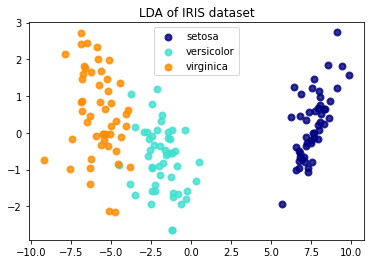

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)
print('LDA: reduced shape', X_lda.shape)

plot_reduced_dataset(X_lda, 'LDA of IRIS dataset')

# 4. Manifold Learning

In [4]:
from sklearn.datasets import load_digits

## 4.1 MultiDimensional Scaling (MDS)

In [5]:
from sklearn.manifold import MDS

X, y = load_digits(return_X_y=True)
print(X.shape)

embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
print(X_transformed.shape)

(1797, 64)
(100, 2)


## 4.2 Isomap Embedding

In [6]:
from sklearn.manifold import Isomap

X, y = load_digits(return_X_y=True)
print(X.shape)

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
print(X_transformed.shape)

(1797, 64)
(100, 2)


## 4.3 t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE

# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X, y = load_digits(return_X_y=True)
print(X.shape)

X_embedded = TSNE(n_components=2).fit_transform(X)
print(X_embedded.shape)